# Task 12: Hands on Neural Nets

_All credit for the code examples of this notebook goes to the book "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow" by A. Geron. Modifications were made and text was added S. Korn in preparation for the hands-on sessions_

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Function to save a figure. This also decides that all output files 
# should stored in the subdirectory 'forests'.
PROJECT_ROOT_DIR = "."
EXERCISE = "neural_nets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", EXERCISE, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## The Perceptron
In the lecture you already encountered the concept of the perceptron which is one of the simplest ANN architectures. This artificial neuron is a "threshold logical unit" (TLU) or "linear threshold unit" (LTU).
It computes the weighted sum `z`

$$
z=w\cdot x_1+\dots w_n\cdot x_n = w^T\cdot x
$$

It then uses step functions like the Heaviside function $\mathcal{H}(z)$ or the Signum function $\text{sgn}(z)$

$$
\mathcal{H}(z)= 
  \begin{cases}
                                   0 & \text{if $z<0$} \\
                                   1 & \text{if $z\geq0$}
  \end{cases}
  \quad\quad
  \text{sgn}(z)= 
  \begin{cases}
                                   -1 & \text{if $z<0$} \\
                                   0 & \text{if $z=0$} \\
                                   +1 & \text{if $z>0$}
  \end{cases}
$$

Let's play around with perceptrons a little bit. Scikit-Learn provides a [Perceptron class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). It implements a single TLU network.

We will use two datasets. The `iris dataset` and the `moons dataset`.

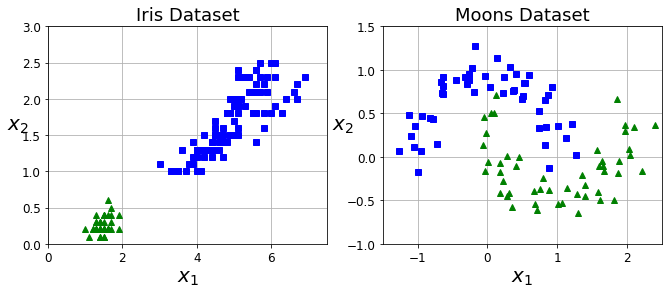

In [2]:
from sklearn.datasets import load_iris # iris dataset
from sklearn.datasets import make_moons # moon dataset

X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

iris = load_iris()
X_iris = iris.data[:, (2, 3)]  # petal length, petal width
y_iris = (iris.target == 0).astype(np.int)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # some blue squares
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # some green triangles
    plt.axis(axes)
    plt.grid(True, which='both') # to visialize things we add a grid
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Now start the plotting.
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_dataset(X_iris, y_iris, [0, 7.5, 0, 3])
plt.title("Iris Dataset", fontsize=18)
plt.subplot(122)
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Moons Dataset", fontsize=18)
plt.show()

Now we want to train a perceptron model for each of the datasets to classifiy the points within the dataset.

In [3]:
from sklearn.linear_model import Perceptron

per_iris_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_iris_clf.fit(X_iris, y_iris)

per_moons_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_moons_clf.fit(X_moons, y_moons)



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

You can repeat the training of the model and set some additional parameters. What happens when you set `verbose` to 1?

Saving figure perceptron_iris_moons_plot


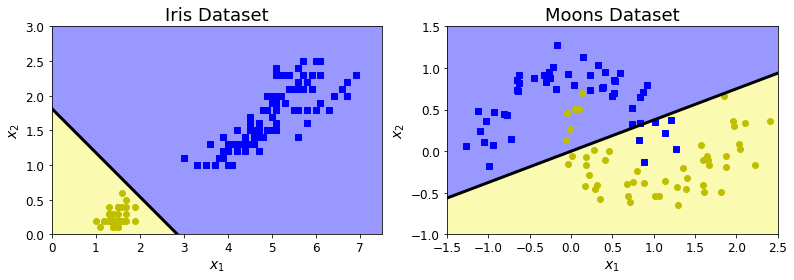

In [54]:
from matplotlib.colors import ListedColormap
axes_iris = [0, 7.5, 0, 3]
axes_moons = [-1.5, 2.5, -1, 1.5]

def get_plot(X, y, axes, clf):
    x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
    
    a = -clf.coef_[0][0] / clf.coef_[0][1]
    b = -clf.intercept_ / clf.coef_[0][1]
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo")

    plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)
    plt.axis(axes)

plt.figure(figsize=(11, 4))
plt.subplot(121)
get_plot(X_iris, y_iris, axes_iris, per_iris_clf)
plt.title("Iris Dataset", fontsize=18)
plt.subplot(122)
get_plot(X_moons, y_moons, axes_moons, per_moons_clf)
plt.title("Moons Dataset", fontsize=18)

save_fig("perceptron_iris_moons_plot")

Ok. This does not look bad when looking at the iris dataset. But when we look at the other dataset we see, that our classifier performs rather poorly. Why is that?

We try to solve this problem using the [Multi-Layer-Perceptron Class](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) from `Scikit-learn`.

Play around with the parameters a little bit and answer these questions: 

* What happens if you change `learning_rate_init` or the layer structure and the number of nodes?
* What happens when you set `verbose` to 1?
* Which activation function is used by default?  
* Why is this function a good choice? 

The initial parameters are not very well chosen. Can you find better parameters?

In [94]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42, max_iter=1000, learning_rate_init=0.01)
mlp_clf.fit(X_moons, y_moons)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.01, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

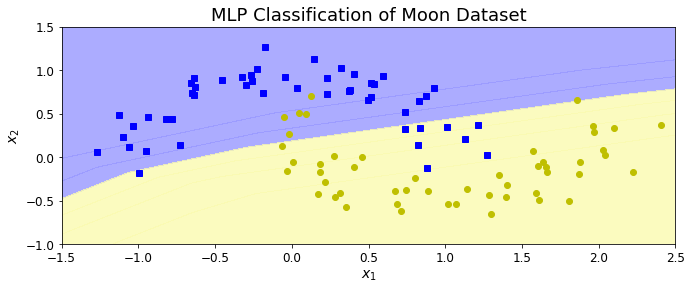

In [95]:
plt.figure(figsize=(11, 4))
axes = axes_moons
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )
Z = mlp_clf.predict_proba(np.c_[x0.ravel(), x1.ravel()])[:, 1]
Z = Z.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "bs")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "yo")
plt.contourf(x0, x1, Z, cmap=custom_cmap, alpha=.8)
plt.title("MLP Classification of Moon Dataset", fontsize=18)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.show()

### Tensorflow and Keras
Let's look at neural nets using Tensorflow and Keras.
We will look at the Fashion MNIST dataset.
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement of the original MNIST dataset for benchmarking machine learning algorithms.

Let's start with importing [Tensorflow](https://www.tensorflow.org/) and [Keras](https://keras.io/).

In [5]:
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version: %s" %tf.__version__)
print("Keras version: %s" %keras.__version__)

Tensorflow version: 2.1.0
Keras version: 2.2.4-tf




Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step




The training set contains 60,000 grayscale images, each 28x28 pixels:


In [7]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full.dtype

dtype('uint8')



Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.


In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.



Here are the corresponding class names:


In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



Let's take a look at a sample of the images in the dataset:


Saving figure fashion_mnist_plot


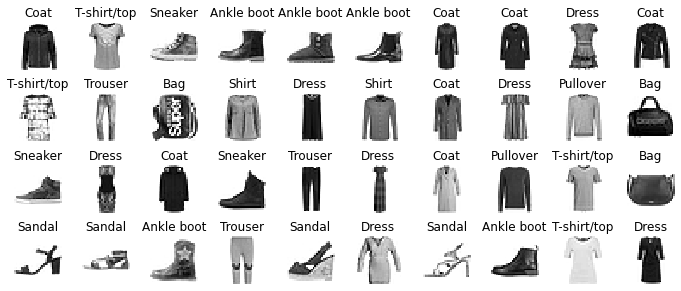

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Ok let's start designing our neural network with Keras.
We will use the [sequential](https://keras.io/api/models/sequential/) API.
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
For more complex networks Keras [functional](https://keras.io/guides/functional_api/) API can be used.

In [12]:
# First we create a sequential model
model = keras.models.Sequential()

# Now we add layers to the network
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# At last we ad the output layer
model.add(keras.layers.Dense(10, activation="softmax"))

We can summarise the model:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Keras also provides a way to plot your model:

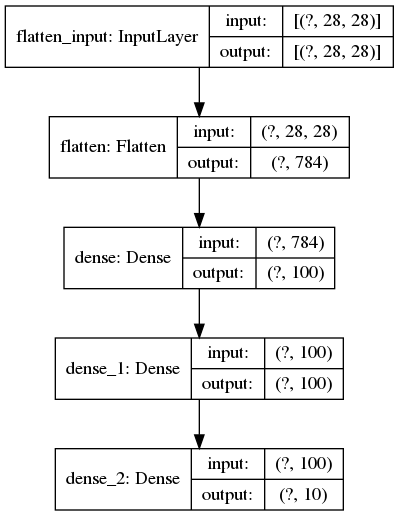

In [14]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

To finish our model we need to compile it.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Finally, we can fit the model:

In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.7782 - accuracy: 0.7432 - val_loss: 0.5446 - val_accuracy: 0.8146
Epoch 2/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.5085 - accuracy: 0.8235 - val_loss: 0.4728 - val_accuracy: 0.8392
Epoch 3/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4589 - accuracy: 0.8386 - val_loss: 0.4387 - val_accuracy: 0.8544
Epoch 4/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4317 - accuracy: 0.8479 - val_loss: 0.4273 - val_accuracy: 0.8524
Epoch 5/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4101 - accuracy: 0.8540 - val_loss: 0.4230 - val_accuracy: 0.8552
Epoch 6/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.3933 - accuracy: 0.8605 - val_loss: 0.4040 - val_accuracy: 0.8604
Epoch 7/30
55000/55000 [==============================] 

After the model is fitted we can plot the history of the model using the `history` object. We will also evaluate the model itself.


Saving figure keras_learning_curves_plot


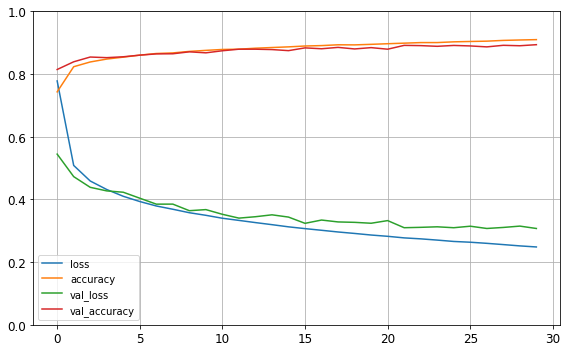

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3427 - accuracy: 0.8823


[0.3426694259405136, 0.8823]